# Exploratory Data Analysis - Time Entries Fact Table
This notebook performs EDA on the `fct__time_entries.csv` file - the core time tracking data.

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, timedelta

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
# Load Time Entries Data
data_dir = r"c:\Users\guine\Documents\BC#4\Hyper_python\BI project\Data Edge Internal Data"
file_path = os.path.join(data_dir, "fct__time_entries.csv")

# Verify file exists
if os.path.exists(file_path):
    print(f"✓ File found: {file_path}")
    print(f"File size: {os.path.getsize(file_path)} bytes")
else:
    print(f"✗ File not found: {file_path}")

✓ File found: c:\Users\guine\Documents\BC#4\Hyper_python\BI project\Data Edge Internal Data\fct__time_entries.csv
File size: 962638 bytes


In [4]:
# Load Employee Data
try:
    df_time_entries_fct = pd.read_csv(file_path)
    print("✓ Data loaded successfully!")
    print(f"Dataset shape: {df_time_entries_fct.shape}")
except Exception as e:
    print(f"✗ Error loading data: {e}")

✓ Data loaded successfully!
Dataset shape: (9808, 7)


In [5]:
# Basic Information
print("=== BASIC INFORMATION ===")
print(f"Shape: {df_time_entries_fct.shape}")
print(f"Columns: {list(df_time_entries_fct.columns)}")
print(f"Data types:\n{df_time_entries_fct.dtypes}")
print(f"\nMemory usage: {df_time_entries_fct.memory_usage(deep=True).sum() / 1024:.2f} KB")

=== BASIC INFORMATION ===
Shape: (9808, 7)
Columns: ['dt', 'time_entry_id', 'project_id', 'user_id', 'billable', 'hours', 'billable_hours']
Data types:
dt                 object
time_entry_id      object
project_id         object
user_id            object
billable             bool
hours             float64
billable_hours    float64
dtype: object

Memory usage: 3132.18 KB


In [6]:
# First Few Rows
print("=== FIRST 5 ROWS ===")
display(df_time_entries_fct.head())

print("\n=== LAST 5 ROWS ===")
display(df_time_entries_fct.tail())

=== FIRST 5 ROWS ===


,dt,time_entry_id,project_id,user_id,billable,hours,billable_hours
0,2025-11-28,67c592453f4d6b42ba2ee7bb,60106d6e9ab6ce7c1dacbc9c,64e5f63d97f5910c716406b8,False,8.0,NaN
1,2025-11-27,67c592453f4d6b42ba2ee7ba,60106d6e9ab6ce7c1dacbc9c,64e5f63d97f5910c716406b8,False,8.0,NaN
2,2025-11-26,67c592453f4d6b42ba2ee7b9,60106d6e9ab6ce7c1dacbc9c,64e5f63d97f5910c716406b8,False,8.0,NaN
3,2025-11-25,67c592453f4d6b42ba2ee7b8,60106d6e9ab6ce7c1dacbc9c,64e5f63d97f5910c716406b8,False,8.0,NaN
4,2025-11-24,67c592453f4d6b42ba2ee7b7,60106d6e9ab6ce7c1dacbc9c,64e5f63d97f5910c716406b8,False,8.0,NaN



=== LAST 5 ROWS ===


,dt,time_entry_id,project_id,user_id,billable,hours,billable_hours
9803,2020-08-05,5f48e06c9f26c42a167db288,5f437f189decb91192e37bc0,5f437e3d9decb91192e3784a,False,8.0,NaN
9804,2020-08-04,5f48de969f26c42a167da353,5f437f189decb91192e37bc0,5f437ae67d26442bf5452ecd,False,8.0,NaN
9805,2020-08-04,5f48e06b9f26c42a167db283,5f437f189decb91192e37bc0,5f437e3d9decb91192e3784a,False,8.0,NaN
9806,2020-08-03,5f48e06b9ee1dc0d5be5c8a0,5f437f189decb91192e37bc0,5f437e3d9decb91192e3784a,False,8.0,NaN
9807,2020-08-03,5f48de95b747320f78d1df36,5f437f189decb91192e37bc0,5f437ae67d26442bf5452ecd,False,8.0,NaN


In [7]:
df_time_entries_fct.billable.value_counts(dropna=False) 

billable
True     5534
False    4274
Name: count, dtype: int64

In [8]:
# Number of unique users per project
print("=== Unique Users per Project ===")
users_per_project = df_time_entries_fct.groupby('project_id')['user_id'].nunique().reset_index()
users_per_project.columns = ['project_id', 'unique_user_count']
display(users_per_project.head(10))

=== Unique Users per Project ===


,project_id,unique_user_count
0,5f437b18d13ed94468add25e,2
1,5f437b557d26442bf54530ac,11
2,5f437f189decb91192e37bc0,11
3,5f60a92df2bfed445099122e,4
4,5f68f9ef5d3b7b2b1d6318e1,1
5,5f9a78d0705f52421cccf38f,1
6,60106d6e9ab6ce7c1dacbc9c,6
7,6012e665c57d2118e911c6cc,1
8,60c255da1054771e634d0080,2
9,60d2daa0f7c72268ae9f007a,2


In [9]:
df_time_entries_fct[df_time_entries_fct['project_id'] == '66f65d5bce65d308a05d83a1']

,dt,time_entry_id,project_id,user_id,billable,hours,billable_hours


In [10]:
df_time_entries_fct.groupby('project_id').hours.sum()

project_id
5f437b18d13ed94468add25e     3027.000000
5f437b557d26442bf54530ac    13461.133333
5f437f189decb91192e37bc0     6679.000000
5f60a92df2bfed445099122e      192.000000
5f68f9ef5d3b7b2b1d6318e1     1313.000000
5f9a78d0705f52421cccf38f      359.000000
60106d6e9ab6ce7c1dacbc9c     6460.000000
6012e665c57d2118e911c6cc      800.000000
60c255da1054771e634d0080      763.000000
60d2daa0f7c72268ae9f007a      100.050000
60d2dc4af7c72268ae9f111a      679.200000
60dac25ad48e003d2a997ba0      696.000000
60de22e5dbd2a938db63bdea     1156.000000
613b395eac2a7406faeb56b6      119.000000
615df4cc939aa5668fb2890b     1213.000000
6179a9ac4d694b7ecbe75ea6      380.000000
618139c71e0030251bd8549c       44.000000
619e81ffb55cac13305c0358      475.000000
61a9c8f31799d3570fbdcf5d      250.000000
61e141a275015b508b2c7526       56.016667
620ea0beac46e3525d1390ba      513.000000
621ce0beba7fbc148a636603      107.500000
6245fd02b3683a40aaf47c65      611.000000
625e8520bfb19a1dd51fb694      771.000000
626a5

=== PROJECT HOURS COMPARISON ANALYSIS ===
✓ Projects data loaded successfully!
Projects dataset shape: (91, 7)

Project duration column info:
  Data type: object
  Sample values: ['232H', '414H', '10321H', '396H', '52H', '7156H', '21358H8M', '982H12M', '0S', '0S']
  Unique values count: 84

✓ Converting project_duration to hours using regex...

Conversion examples:


,project_duration,project_duration_hours
0,232H,232.0
1,414H,414.0
2,10321H,10321.0
3,396H,396.0
4,52H,52.0
5,7156H,7156.0
6,21358H8M,21358.0
7,982H12M,982.0
8,0S,0.0
9,0S,0.0


Projects after cleaning: 91
✓ Time entries grouped by project
Number of projects from df_time_entries_Fct with time entries: 65

=== RESULTS ===
Total projects analyzed: 91
Projects with exact match (difference = 0): 52
Projects with differences: 39

=== PROJECT HOURS COMPARISON (First 20 rows) ===


,project_id,hours_difference,is_exact_match,clockify_project_billable
0,5f60a92df2bfed445099122e,40.000000,False,False
1,65a66b6f7349ba6dbd1f1086,0.000000,True,False
2,5f437f189decb91192e37bc0,3642.000000,False,False
3,6179a9ac4d694b7ecbe75ea6,16.000000,False,False
4,65a66b65efacdd3a4371df50,0.000000,True,False
5,60106d6e9ab6ce7c1dacbc9c,696.000000,False,False
6,5f437b557d26442bf54530ac,7896.866667,False,False
7,60d2dc4af7c72268ae9f111a,302.800000,False,False
8,65a4f2b9c103c556d36f5a75,0.000000,True,False
9,66f65d5bce65d308a05d83a1,0.000000,True,True



=== SUMMARY STATISTICS ===
Hours difference statistics:
  Mean difference: 346.97
  Median difference: 0.00
  Min difference: -0.75
  Max difference: 7896.87
  Standard deviation: 1060.55

=== PROJECTS WITH LARGEST OVERRUNS (Negative differences) ===


,project_id,hours_difference,is_exact_match,clockify_project_billable
67,6447b0322280b611f9e69345,-0.750000,True,True
78,680b8006b884b21e998f3a9c,-0.500000,True,True
20,60d2daa0f7c72268ae9f007a,-0.050000,True,True
38,61e141a275015b508b2c7526,-0.016667,True,True



=== PROJECTS WITH LARGEST UNDERRUNS (Positive differences) ===


,project_id,hours_difference,is_exact_match,clockify_project_billable
6,5f437b557d26442bf54530ac,7896.866667,False,False
2,5f437f189decb91192e37bc0,3642.000000,False,False
14,6062d8290a1d5962625aece9,3608.000000,False,True
42,621ced26e475a260c9f4f403,2928.000000,False,True
71,64873d76ef25817935b3a67d,2441.000000,False,True
58,6307524e45e295773c9f3946,1428.000000,False,True
29,619e81ffb55cac13305c0358,1230.000000,False,True
18,60b73320b2f84254e54252e3,1088.000000,False,True
57,6576c719b0e5636f81a62549,1076.000000,False,True
61,63c9368e2d26644e28ab300f,805.000000,False,True


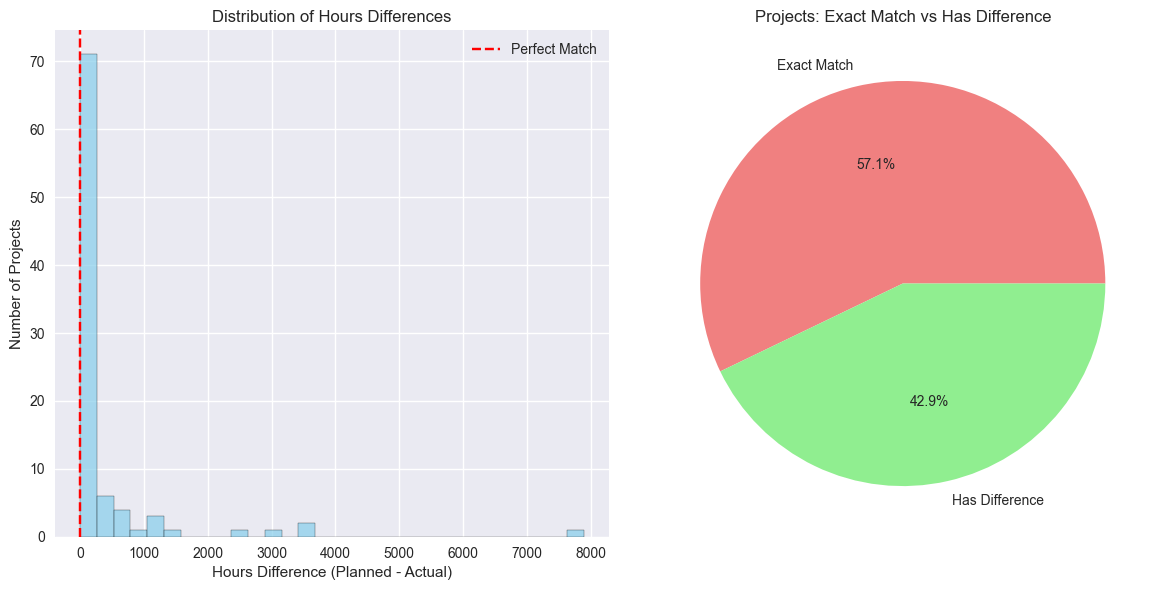


✓ Analysis complete. Result stored in 'result' variable with 91 projects.


In [ ]:
# Load Projects Dimension Data and Compare with Time Entries
print("=== PROJECT HOURS COMPARISON ANALYSIS ===")

# Load the projects dimension file
projects_file_path = os.path.join(data_dir, "dim__projects__anonymized.csv")

try:
    df_projects = pd.read_csv(projects_file_path)
    print(f"✓ Projects data loaded successfully!")
    print(f"Projects dataset shape: {df_projects.shape}")
    
    # Check the data types and sample values of project_duration
    print(f"\nProject duration column info:")
    print(f"  Data type: {df_projects['project_duration'].dtype}")
    print(f"  Sample values: {df_projects['project_duration'].head(10).tolist()}")
    print(f"  Unique values count: {df_projects['project_duration'].nunique()}")
    
    # Convert project_duration using regex to extract hours
    print(f"\n✓ Converting project_duration to hours using regex...")
    
    import re
    
    def extract_hours(duration_str):
        """Extract hours from duration string format like '21358H8M', '0H0M0S', '0S'"""
        if pd.isna(duration_str):
            return None
        
        duration_str = str(duration_str).strip()
        
        # Handle special case '0S' (0 seconds = 0 hours)
        if duration_str == '0S':
            return 0.0
        
        # Use regex to find hours (number before 'H')
        hours_match = re.search(r'(\d+)H', duration_str)
        
        if hours_match:
            return float(hours_match.group(1))
        else:
            # If no 'H' found, check if it's just a number
            if duration_str.isdigit():
                return float(duration_str)
            else:
                return None
    
    # Apply the conversion function
    df_projects['project_duration_hours'] = df_projects['project_duration'].apply(extract_hours)
    
    # Show some examples of the conversion
    print(f"\nConversion examples:")
    sample_conversions = df_projects[['project_duration', 'project_duration_hours']].head(15)
    display(sample_conversions)
    
    # Check for any conversion issues
    invalid_durations = df_projects['project_duration_hours'].isna().sum()
    if invalid_durations > 0:
        print(f"⚠️  Warning: {invalid_durations} project_duration values could not be converted")
        print("Examples of unconverted values:")
        unconverted = df_projects[df_projects['project_duration_hours'].isna()]['project_duration'].unique()[:10]
        print(unconverted)
    
    # Remove projects with invalid duration values
    df_projects_clean = df_projects.dropna(subset=['project_duration_hours'])
    print(f"Projects after cleaning: {len(df_projects_clean)}")
    
    # Group time entries by project_id and sum hours
    # Group time entries by project_id, sum hours, and get billable status
    time_entries_by_project = df_time_entries_fct.groupby('project_id').agg({
        'hours': 'sum',
        'billable': 'first',
        'dt':  # or use 'max', 'min', or a custom function depending on your needs
    }).reset_index()

    time_entries_by_project.columns = ['project_id', 'actual_hours', 'billable']
    
    print(f"✓ Time entries grouped by project")
    print(f"Number of projects from df_time_entries_Fct with time entries: {len(time_entries_by_project)}")
    
    # Merge with projects data
    project_comparison = df_projects_clean[['project_id', 'project_duration_hours', 'clockify_project_billable']].merge(
        time_entries_by_project, 
        on='project_id', 
        how='left'
    )
    
    # Fill NaN actual_hours with 0 for projects with no time entries
    project_comparison['actual_hours'] = project_comparison['actual_hours'].fillna(0)
    
    # Calculate the subtraction (project_duration_hours - actual_hours)
    project_comparison['hours_difference'] = project_comparison['project_duration_hours'] - project_comparison['actual_hours']
    
    # Create a boolean column to check if subtraction is 0
    project_comparison['is_exact_match'] = project_comparison['hours_difference'] <= 2
    
    # Select only the 3 required columns
    result = project_comparison[['project_id', 'hours_difference', 'is_exact_match', 'clockify_project_billable']].copy()
    
    print(f"\n=== RESULTS ===")
    print(f"Total projects analyzed: {len(result)}")
    print(f"Projects with exact match (difference = 0): {result['is_exact_match'].sum()}")
    print(f"Projects with differences: {(~result['is_exact_match']).sum()}")
    
    # Display the results
    print(f"\n=== PROJECT HOURS COMPARISON (First 20 rows) ===")
    display(result.head(20))
    
    # Show some summary statistics
    print(f"\n=== SUMMARY STATISTICS ===")
    print(f"Hours difference statistics:")
    print(f"  Mean difference: {result['hours_difference'].mean():.2f}")
    print(f"  Median difference: {result['hours_difference'].median():.2f}")
    print(f"  Min difference: {result['hours_difference'].min():.2f}")
    print(f"  Max difference: {result['hours_difference'].max():.2f}")
    print(f"  Standard deviation: {result['hours_difference'].std():.2f}")
    
    # Show projects with largest positive and negative differences
    print(f"\n=== PROJECTS WITH LARGEST OVERRUNS (Negative differences) ===")
    overruns = result[result['hours_difference'] < 0].sort_values('hours_difference').head(10)
    display(overruns)
    
    print(f"\n=== PROJECTS WITH LARGEST UNDERRUNS (Positive differences) ===")
    underruns = result[result['hours_difference'] > 0].sort_values('hours_difference', ascending=False).head(10)
    display(underruns)
    
    # Create a simple visualization
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    result['hours_difference'].hist(bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Distribution of Hours Differences')
    plt.xlabel('Hours Difference (Planned - Actual)')
    plt.ylabel('Number of Projects')
    plt.axvline(x=0, color='red', linestyle='--', label='Perfect Match')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    match_counts = result['is_exact_match'].value_counts()
    
    # Create labels based on actual data
    labels = []
    for value in match_counts.index:
        if value:
            labels.append('Exact Match')
        else:
            labels.append('Has Difference')
    
    # Only create pie chart if we have data
    if len(match_counts) > 0:
        plt.pie(match_counts.values, labels=labels, autopct='%1.1f%%', 
                colors=['lightcoral', 'lightgreen'][:len(match_counts)])
        plt.title('Projects: Exact Match vs Has Difference')
    else:
        plt.text(0.5, 0.5, 'No data available', ha='center', va='center')
        plt.title('Projects: Exact Match vs Has Difference')
    
    plt.tight_layout()
    plt.show()
    
    # Store the result for further analysis if needed
    print(f"\n✓ Analysis complete. Result stored in 'result' variable with {len(result)} projects.")
    
except FileNotFoundError:
    print(f"✗ Projects file not found: {projects_file_path}")
    print("Please check if the file exists and the name is correct")
except Exception as e:
    print(f"✗ Error during analysis: {e}")
    import traceback
    traceback.print_exc()

In [21]:
time_entries_by_project

,project_id,actual_hours,billable
0,5f437b18d13ed94468add25e,3027.000000,True
1,5f437b557d26442bf54530ac,13461.133333,False
2,5f437f189decb91192e37bc0,6679.000000,False
3,5f60a92df2bfed445099122e,192.000000,False
4,5f68f9ef5d3b7b2b1d6318e1,1313.000000,True
5,5f9a78d0705f52421cccf38f,359.000000,True
6,60106d6e9ab6ce7c1dacbc9c,6460.000000,False
7,6012e665c57d2118e911c6cc,800.000000,True
8,60c255da1054771e634d0080,763.000000,True
9,60d2daa0f7c72268ae9f007a,100.050000,True


In [25]:
# Compare billable columns in project_comparison
print("=== COMPARING BILLABLE COLUMNS ===")

if 'project_comparison' in locals():
    print("✓ 'project_comparison' DataFrame found.")
    
    # Check if both columns exist
    if 'clockify_project_billable' in project_comparison.columns and 'billable' in project_comparison.columns:
        
        # Create a boolean column to check if the two billable columns match
        project_comparison['billable_match'] = project_comparison['clockify_project_billable'] == project_comparison['billable']
        
        # Count occurrences
        match_counts = project_comparison['billable_match'].value_counts()
        
        print("\n=== RESULTS ===")
        print(f"Projects where billable columns MATCH: {match_counts.get(True, 0)}")
        print(f"Projects where billable columns DO NOT MATCH: {match_counts.get(False, 0)}")
        
        # Show percentage
        total = len(project_comparison)
        if total > 0:
            match_pct = (match_counts.get(True, 0) / total) * 100
            print(f"\nMatch percentage: {match_pct:.2f}%")
        
        # Show some examples of mismatches
        mismatches = project_comparison[project_comparison['billable_match'] == False]
        if len(mismatches) > 0:
            print(f"\n=== EXAMPLES OF MISMATCHES (First 10) ===")
            display(mismatches[['project_id', 'clockify_project_billable', 'billable', 'actual_hours']].head(10))
        
        # Create a crosstab for detailed breakdown
        print("\n=== DETAILED BREAKDOWN ===")
        crosstab = pd.crosstab(
            project_comparison['clockify_project_billable'],
            project_comparison['billable'],
            margins=True
        )
        crosstab.index.name = 'clockify_project_billable'
        crosstab.columns.name = 'billable (from time entries)'
        display(crosstab)
        
    else:
        print("❌ One or both billable columns not found in project_comparison.")
        print(f"Available columns: {list(project_comparison.columns)}")
        
else:
    print("❌ 'project_comparison' DataFrame not found. Please run the PROJECT HOURS COMPARISON ANALYSIS cell first.")

=== COMPARING BILLABLE COLUMNS ===
✓ 'project_comparison' DataFrame found.

=== RESULTS ===
Projects where billable columns MATCH: 65
Projects where billable columns DO NOT MATCH: 26

Match percentage: 71.43%

=== EXAMPLES OF MISMATCHES (First 10) ===


,project_id,clockify_project_billable,billable,actual_hours
8,65a4f2b9c103c556d36f5a75,False,NaN,0.0
9,66f65d5bce65d308a05d83a1,True,NaN,0.0
14,6062d8290a1d5962625aece9,True,NaN,0.0
17,6017b65f21800912c64a4f50,True,NaN,0.0
18,60b73320b2f84254e54252e3,True,NaN,0.0
21,63524f9e9cc2917e2fd06cd4,True,NaN,0.0
23,62fb42e745106f2b5a1d5d7d,True,NaN,0.0
32,65d649b8b62c79048ac384c8,True,NaN,0.0
42,621ced26e475a260c9f4f403,True,NaN,0.0
43,6329b1968bf0ea1d424867d3,True,NaN,0.0



=== DETAILED BREAKDOWN ===


billable (from time entries),False,True,All
clockify_project_billable,,,
False,8,0,8
True,0,57,57
All,8,57,65


In [13]:
len(df_time_entries_fct.project_id.unique())

65

In [14]:
df_projects_clean.project_id.nunique()

91

In [23]:
project_comparison[(project_comparison['project_duration_hours'] == project_comparison['actual_hours']) & (project_comparison['actual_hours'] == 0)]

,project_id,project_duration_hours,clockify_project_billable,actual_hours,billable,hours_difference,is_exact_match
8,65a4f2b9c103c556d36f5a75,0.0,False,0.0,NaN,0.0,True
9,66f65d5bce65d308a05d83a1,0.0,True,0.0,NaN,0.0,True
49,632088d2546c0d171c027014,0.0,True,0.0,NaN,0.0,True
72,649ab2ef8212c016cee5c856,0.0,True,0.0,NaN,0.0,True


In [16]:
project_comparison[project_comparison['is_exact_match'] == True]

,project_id,project_duration_hours,clockify_project_billable,actual_hours,hours_difference,is_exact_match
1,65a66b6f7349ba6dbd1f1086,414.0,False,414.000000,0.000000,True
4,65a66b65efacdd3a4371df50,52.0,False,52.000000,0.000000,True
8,65a4f2b9c103c556d36f5a75,0.0,False,0.000000,0.000000,True
9,66f65d5bce65d308a05d83a1,0.0,True,0.000000,0.000000,True
10,5f437b18d13ed94468add25e,3027.0,True,3027.000000,0.000000,True
11,5f68f9ef5d3b7b2b1d6318e1,1313.0,True,1313.000000,0.000000,True
12,6012e665c57d2118e911c6cc,800.0,True,800.000000,0.000000,True
15,6360159c980fd406068014ed,212.0,True,212.000000,0.000000,True
16,626a5a6334fd3c736767565b,4667.0,True,4667.000000,0.000000,True
19,60c255da1054771e634d0080,763.0,True,763.000000,0.000000,True


In [ ]:
len(project_comparison[(project_comparison['is_exact_match'] == False) & (project_comparison['actual_hours'] == 0)])


21

In [14]:
# Statistics on Boolean Column Combinations
print("=== STATISTICS ON PROJECT STATUS COMBINATIONS ===")

# Check if the 'project_comparison' DataFrame exists
if 'project_comparison' in locals():
    print("✓ 'project_comparison' DataFrame found.")
    
    # Use pd.crosstab to create a frequency table of the two boolean columns.
    # This is the most direct way to count combinations.
    combination_counts = pd.crosstab(
        project_comparison['clockify_project_billable'],
        project_comparison['is_exact_match']
    )
    
    # Rename columns for clarity
    combination_counts.columns = ['Has Difference', 'Exact Match']
    combination_counts.index.name = 'Is Billable'

    print("\n--- Counts of Combinations ---")
    print("This table shows the number of projects for each combination of billable status and time-tracking accuracy.")
    display(combination_counts)

else:
    print("❌ 'project_comparison' DataFrame not found. Please run the cell that creates it first (cell with 'PROJECT HOURS COMPARISON ANALYSIS').")

=== STATISTICS ON PROJECT STATUS COMBINATIONS ===
✓ 'project_comparison' DataFrame found.

--- Counts of Combinations ---
This table shows the number of projects for each combination of billable status and time-tracking accuracy.


,Has Difference,Exact Match
Is Billable,,
False,6,3
True,33,49


In [17]:
project_comparison

,project_id,project_duration_hours,clockify_project_billable,actual_hours,hours_difference,is_exact_match
0,5f60a92df2bfed445099122e,232.0,False,192.000000,40.000000,False
1,65a66b6f7349ba6dbd1f1086,414.0,False,414.000000,0.000000,True
2,5f437f189decb91192e37bc0,10321.0,False,6679.000000,3642.000000,False
3,6179a9ac4d694b7ecbe75ea6,396.0,False,380.000000,16.000000,False
4,65a66b65efacdd3a4371df50,52.0,False,52.000000,0.000000,True
5,60106d6e9ab6ce7c1dacbc9c,7156.0,False,6460.000000,696.000000,False
6,5f437b557d26442bf54530ac,21358.0,False,13461.133333,7896.866667,False
7,60d2dc4af7c72268ae9f111a,982.0,False,679.200000,302.800000,False
8,65a4f2b9c103c556d36f5a75,0.0,False,0.000000,0.000000,True
9,66f65d5bce65d308a05d83a1,0.0,True,0.000000,0.000000,True


In [18]:
# Check if clockify_project_billable changes for the same project_id
print("=== CHECKING IF BILLABLE STATUS CHANGES PER PROJECT ===")

if 'df_projects_clean' in locals():
    # Group by project_id and count unique values of clockify_project_billable
    billable_consistency = df_projects_clean.groupby('project_id')['clockify_project_billable'].nunique().reset_index()
    billable_consistency.columns = ['project_id', 'unique_billable_values']
    
    # Create a boolean column: True if the value changes (more than 1 unique value), False otherwise
    billable_consistency['billable_status_changes'] = billable_consistency['unique_billable_values'] > 1
    
    # Count occurrences
    change_counts = billable_consistency['billable_status_changes'].value_counts()
    
    print("\n=== RESULTS ===")
    print(f"Projects where billable status DOES NOT change: {change_counts.get(False, 0)}")
    print(f"Projects where billable status CHANGES: {change_counts.get(True, 0)}")
    
    # Show some examples of projects where the status changes
    if change_counts.get(True, 0) > 0:
        print("\n=== EXAMPLES OF PROJECTS WHERE BILLABLE STATUS CHANGES ===")
        changing_projects = billable_consistency[billable_consistency['billable_status_changes'] == True]['project_id'].head(5)
        
        for proj_id in changing_projects:
            print(f"\nProject ID: {proj_id}")
            display(df_projects_clean[df_projects_clean['project_id'] == proj_id][['project_id', 'clockify_project_billable']])
    
else:
    print("❌ 'df_projects_clean' DataFrame not found. Please run the PROJECT HOURS COMPARISON ANALYSIS cell first.")

=== CHECKING IF BILLABLE STATUS CHANGES PER PROJECT ===

=== RESULTS ===
Projects where billable status DOES NOT change: 91
Projects where billable status CHANGES: 0


=== USERS PER PROJECT - STATISTICAL ANALYSIS ===

✓ Analysis complete for 65 projects

=== DESCRIPTIVE STATISTICS ===
count    65.000000
mean      2.030769
std       2.179229
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max      11.000000
Name: user_count, dtype: float64

Additional metrics:
  Mode (most common): 1
  Range: 10
  Variance: 4.75

=== DISTRIBUTION OF USER COUNTS ===


user_count
1     41
2     11
3      5
4      4
6      1
10     1
11     2
Name: count, dtype: int64


=== PERCENTILE BREAKDOWN ===
  10th percentile: 1.0 users
  25th percentile: 1.0 users
  50th percentile: 1.0 users
  75th percentile: 2.0 users
  90th percentile: 4.0 users
  95th percentile: 5.6 users
  99th percentile: 11.0 users

=== PROJECT CATEGORIES BY TEAM SIZE ===
team_size_category
Solo (1)            41
Small (2-3)         16
Medium (4-5)         4
Large (6-10)         2
Very Large (10+)     2
Name: count, dtype: int64

Percentages:
team_size_category
Solo (1)            63.08
Small (2-3)         24.62
Medium (4-5)         6.15
Large (6-10)         3.08
Very Large (10+)     3.08
Name: count, dtype: float64

=== PROJECTS WITH MOST USERS (Top 10) ===


,project_id,user_count,team_size_category
1,5f437b557d26442bf54530ac,11,Very Large (10+)
2,5f437f189decb91192e37bc0,11,Very Large (10+)
10,60d2dc4af7c72268ae9f111a,10,Large (6-10)
6,60106d6e9ab6ce7c1dacbc9c,6,Large (6-10)
3,5f60a92df2bfed445099122e,4,Medium (4-5)
15,6179a9ac4d694b7ecbe75ea6,4,Medium (4-5)
23,625e8520bfb19a1dd51fb694,4,Medium (4-5)
44,65a66b6f7349ba6dbd1f1086,4,Medium (4-5)
13,613b395eac2a7406faeb56b6,3,Small (2-3)
24,626a5a6334fd3c736767565b,3,Small (2-3)



=== PROJECTS WITH FEWEST USERS (Bottom 10) ===


,project_id,user_count,team_size_category
4,5f68f9ef5d3b7b2b1d6318e1,1,Solo (1)
5,5f9a78d0705f52421cccf38f,1,Solo (1)
7,6012e665c57d2118e911c6cc,1,Solo (1)
11,60dac25ad48e003d2a997ba0,1,Solo (1)
12,60de22e5dbd2a938db63bdea,1,Solo (1)
14,615df4cc939aa5668fb2890b,1,Solo (1)
16,618139c71e0030251bd8549c,1,Solo (1)
18,61a9c8f31799d3570fbdcf5d,1,Solo (1)
19,61e141a275015b508b2c7526,1,Solo (1)
20,620ea0beac46e3525d1390ba,1,Solo (1)


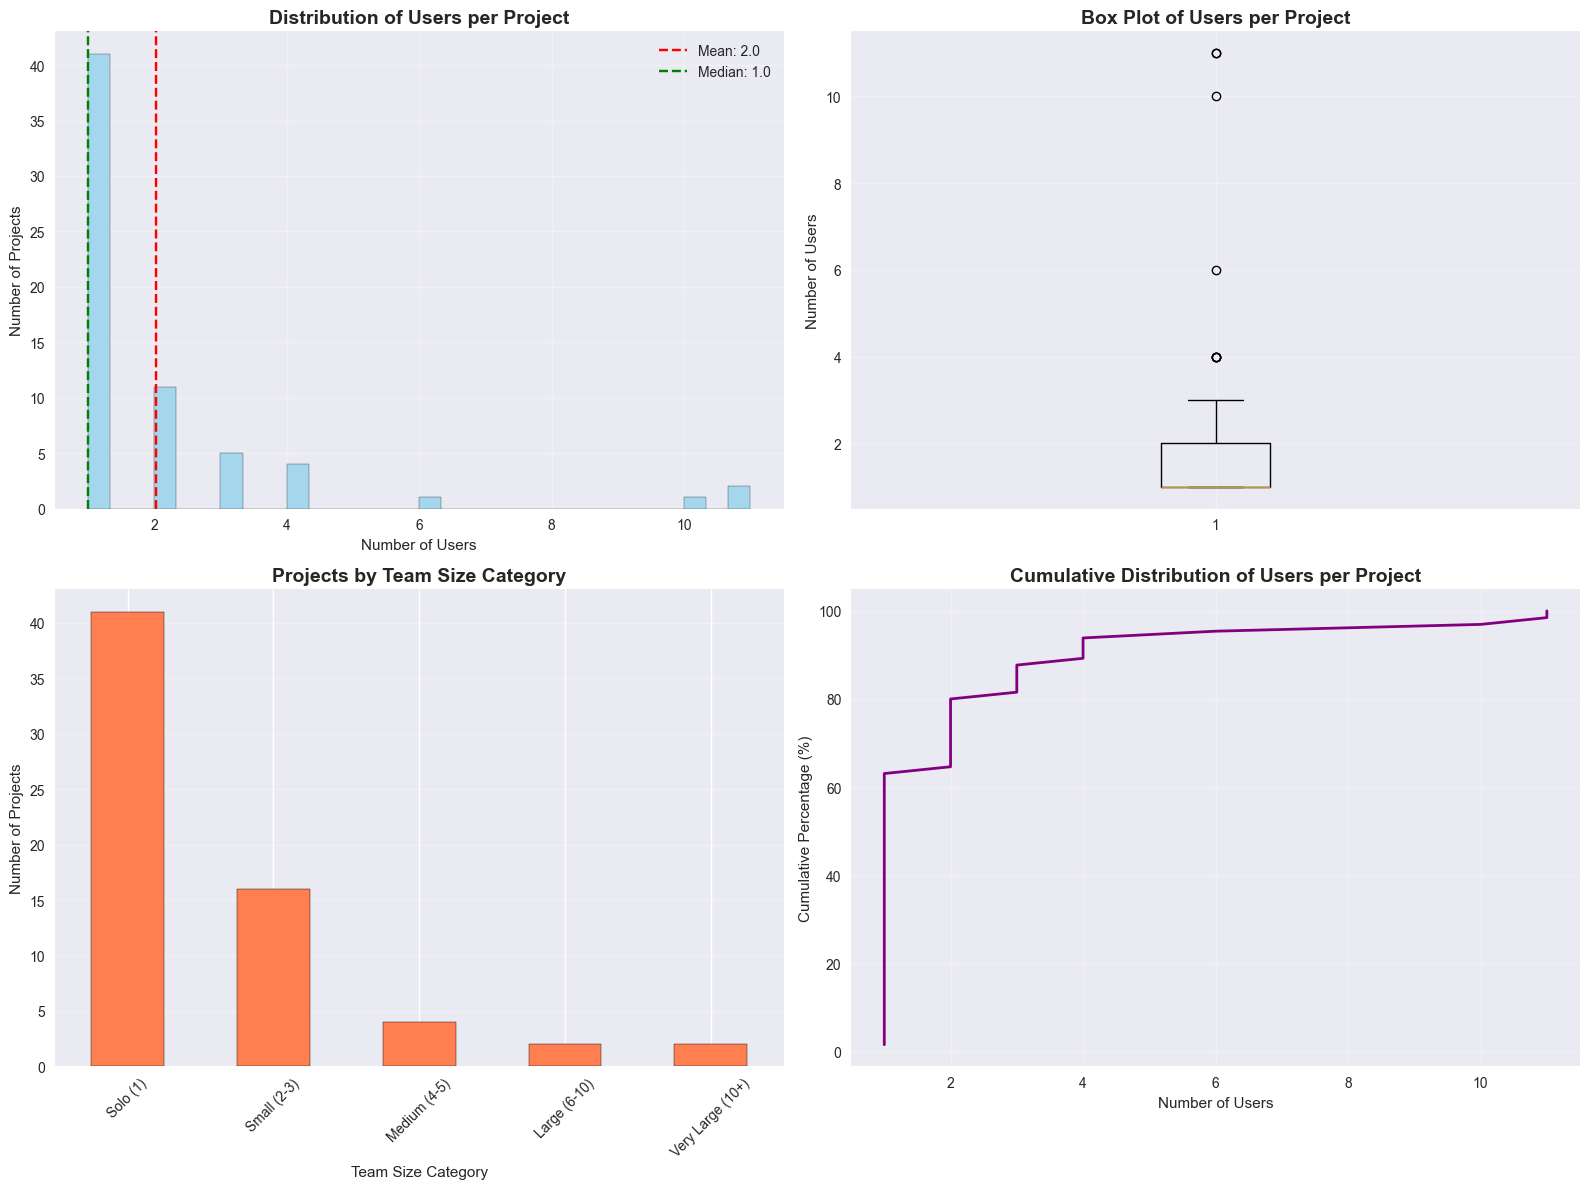


✓ Analysis complete. Results stored in 'users_per_project' DataFrame


,project_id,user_count,team_size_category
0,5f437b18d13ed94468add25e,2,Small (2-3)
1,5f437b557d26442bf54530ac,11,Very Large (10+)
2,5f437f189decb91192e37bc0,11,Very Large (10+)
3,5f60a92df2bfed445099122e,4,Medium (4-5)
4,5f68f9ef5d3b7b2b1d6318e1,1,Solo (1)
5,5f9a78d0705f52421cccf38f,1,Solo (1)
6,60106d6e9ab6ce7c1dacbc9c,6,Large (6-10)
7,6012e665c57d2118e911c6cc,1,Solo (1)
8,60c255da1054771e634d0080,2,Small (2-3)
9,60d2daa0f7c72268ae9f007a,2,Small (2-3)


In [9]:
# Statistical Analysis of Users per Project
print("=== USERS PER PROJECT - STATISTICAL ANALYSIS ===")

# Calculate users per project
users_per_project = df_time_entries_fct.groupby('project_id')['user_id'].nunique().reset_index()
users_per_project.columns = ['project_id', 'user_count']

print(f"\n✓ Analysis complete for {len(users_per_project)} projects")

# === DESCRIPTIVE STATISTICS ===
print("\n=== DESCRIPTIVE STATISTICS ===")
print(users_per_project['user_count'].describe())

print(f"\nAdditional metrics:")
print(f"  Mode (most common): {users_per_project['user_count'].mode().values[0] if len(users_per_project['user_count'].mode()) > 0 else 'N/A'}")
print(f"  Range: {users_per_project['user_count'].max() - users_per_project['user_count'].min()}")
print(f"  Variance: {users_per_project['user_count'].var():.2f}")

# === DISTRIBUTION BREAKDOWN ===
print("\n=== DISTRIBUTION OF USER COUNTS ===")
user_count_distribution = users_per_project['user_count'].value_counts().sort_index()
display(user_count_distribution.head(20))

# === PERCENTILE ANALYSIS ===
print("\n=== PERCENTILE BREAKDOWN ===")
percentiles = [10, 25, 50, 75, 90, 95, 99]
for p in percentiles:
    value = np.percentile(users_per_project['user_count'], p)
    print(f"  {p}th percentile: {value:.1f} users")

# === CATEGORIES ===
print("\n=== PROJECT CATEGORIES BY TEAM SIZE ===")
users_per_project['team_size_category'] = pd.cut(
    users_per_project['user_count'],
    bins=[0, 1, 3, 5, 10, float('inf')],
    labels=['Solo (1)', 'Small (2-3)', 'Medium (4-5)', 'Large (6-10)', 'Very Large (10+)']
)

category_counts = users_per_project['team_size_category'].value_counts().sort_index()
print(category_counts)
print(f"\nPercentages:")
print((category_counts / len(users_per_project) * 100).round(2))

# === TOP AND BOTTOM PROJECTS ===
print("\n=== PROJECTS WITH MOST USERS (Top 10) ===")
top_projects = users_per_project.nlargest(10, 'user_count')
display(top_projects)

print("\n=== PROJECTS WITH FEWEST USERS (Bottom 10) ===")
bottom_projects = users_per_project.nsmallest(10, 'user_count')
display(bottom_projects)

# === VISUALIZATIONS ===
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram
axes[0, 0].hist(users_per_project['user_count'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Users per Project', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Number of Users')
axes[0, 0].set_ylabel('Number of Projects')
axes[0, 0].axvline(users_per_project['user_count'].mean(), color='red', linestyle='--', label=f'Mean: {users_per_project["user_count"].mean():.1f}')
axes[0, 0].axvline(users_per_project['user_count'].median(), color='green', linestyle='--', label=f'Median: {users_per_project["user_count"].median():.1f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Box Plot
axes[0, 1].boxplot(users_per_project['user_count'], vert=True)
axes[0, 1].set_title('Box Plot of Users per Project', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Number of Users')
axes[0, 1].grid(True, alpha=0.3)

# 3. Bar Chart of Categories
category_counts.plot(kind='bar', ax=axes[1, 0], color='coral', edgecolor='black')
axes[1, 0].set_title('Projects by Team Size Category', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Team Size Category')
axes[1, 0].set_ylabel('Number of Projects')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Cumulative Distribution
sorted_counts = users_per_project['user_count'].sort_values()
cumulative_pct = np.arange(1, len(sorted_counts) + 1) / len(sorted_counts) * 100
axes[1, 1].plot(sorted_counts, cumulative_pct, color='purple', linewidth=2)
axes[1, 1].set_title('Cumulative Distribution of Users per Project', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Number of Users')
axes[1, 1].set_ylabel('Cumulative Percentage (%)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# === SAVE RESULTS ===
print("\n✓ Analysis complete. Results stored in 'users_per_project' DataFrame")
display(users_per_project.head(20))

In [ ]:
users_per_project.user_count.sum()

np.int64(132)

=== AVERAGE PROJECT SIZE ANALYSIS ===

Total projects: 65

=== DESCRIPTIVE STATISTICS ===
Average hours per project: 1012.24
Median hours per project: 388.00
Standard deviation: 2050.40
Min hours: 2.00
Max hours: 13461.13

=== PERCENTILE BREAKDOWN ===
  10th percentile: 21.20 hours
  25th percentile: 76.00 hours
  50th percentile: 388.00 hours
  75th percentile: 951.00 hours
  90th percentile: 2177.20 hours
  95th percentile: 4339.00 hours
  99th percentile: 9120.57 hours

=== PROJECT SIZE CATEGORIES ===
size_category
Tiny (<50h)                12
Small (50-200h)            16
Medium (200-500h)           8
Large (500-1000h)          14
Very Large (1000-2000h)     7
Huge (>2000h)               8
Name: count, dtype: int64

Percentages:
size_category
Tiny (<50h)                18.46
Small (50-200h)            24.62
Medium (200-500h)          12.31
Large (500-1000h)          21.54
Very Large (1000-2000h)    10.77
Huge (>2000h)              12.31
Name: count, dtype: float64


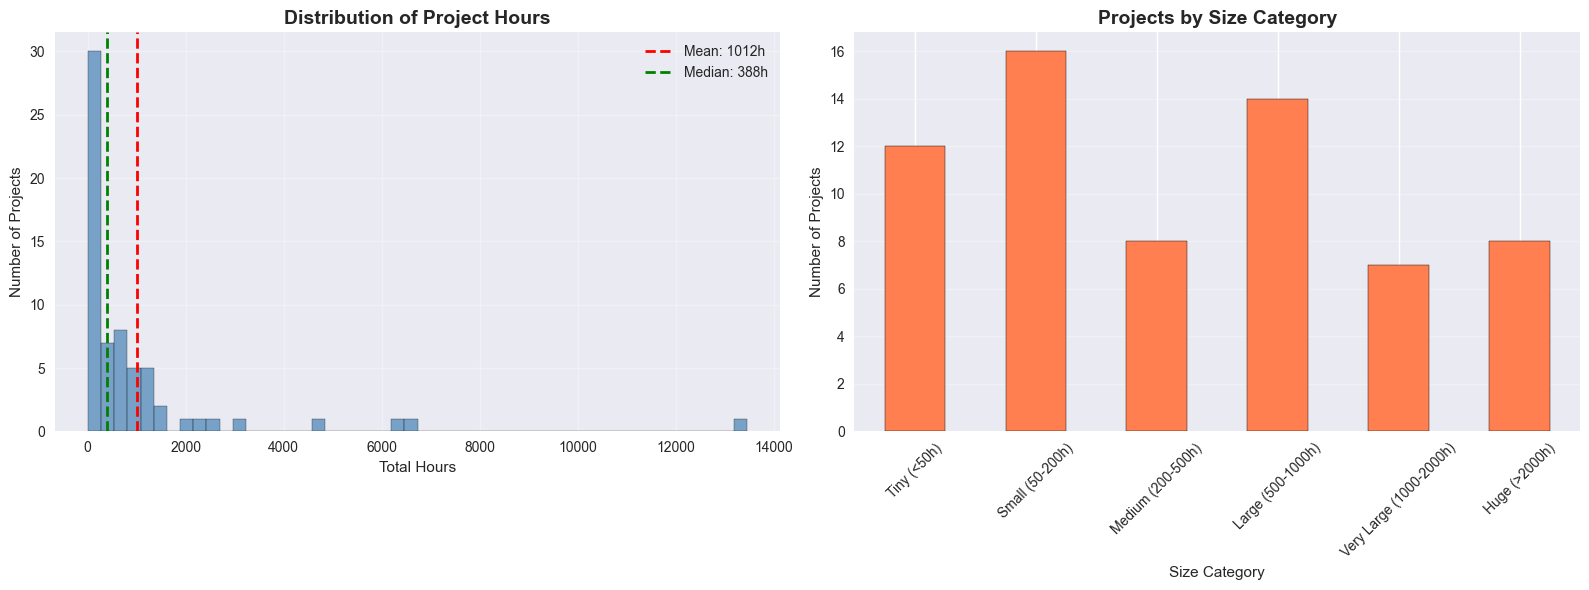


=== TOP 20 LARGEST PROJECTS ===


,project_id,total_hours,size_category
1,5f437b557d26442bf54530ac,13461.133333,Huge (>2000h)
2,5f437f189decb91192e37bc0,6679.000000,Huge (>2000h)
6,60106d6e9ab6ce7c1dacbc9c,6460.000000,Huge (>2000h)
24,626a5a6334fd3c736767565b,4667.000000,Huge (>2000h)
0,5f437b18d13ed94468add25e,3027.000000,Huge (>2000h)
48,65eecc5033c90b16ead59691,2582.000000,Huge (>2000h)
46,65b668d2bd0f4626444bf06e,2268.000000,Huge (>2000h)
45,65b621afdfeae474a92193dc,2041.000000,Huge (>2000h)
56,66c73f7caf3a79534feebd76,1353.000000,Very Large (1000-2000h)
36,6426b57bf9cb2478145b7820,1352.000000,Very Large (1000-2000h)



=== TOP 20 SMALLEST PROJECTS ===


,project_id,total_hours,size_category
40,648c0b83abc41f2c316ece73,2.000000,Tiny (<50h)
47,65cf4bf7979df973b031dc4b,3.000000,Tiny (<50h)
57,66c86e21af3a79534f0b87db,7.000000,Tiny (<50h)
38,6446656b63a55154ded6ba1d,13.000000,Tiny (<50h)
55,667bd75fe0efde03340292a4,13.000000,Tiny (<50h)
32,63ff0e13a094e40fbef46cb5,19.000000,Tiny (<50h)
51,662b4a5f24e5bf66b6a5f65e,20.000000,Tiny (<50h)
35,64130bc480994e1aa4892d2a,23.000000,Tiny (<50h)
34,64103fd7cd49c2355813d5c9,29.000000,Tiny (<50h)
62,677fb4341c567d719ff4f8bd,39.000000,Tiny (<50h)



✓ Results stored in 'project_hours' DataFrame


In [12]:
# Calculate average hours per project from time entries
print("=== AVERAGE PROJECT SIZE ANALYSIS ===\n")

# Group by project_id and sum hours
project_hours = df_time_entries_fct.groupby('project_id')['hours'].sum().reset_index()
project_hours.columns = ['project_id', 'total_hours']

# Calculate statistics
avg_hours = project_hours['total_hours'].mean()
median_hours = project_hours['total_hours'].median()
std_hours = project_hours['total_hours'].std()

print(f"Total projects: {len(project_hours)}")
print(f"\n=== DESCRIPTIVE STATISTICS ===")
print(f"Average hours per project: {avg_hours:.2f}")
print(f"Median hours per project: {median_hours:.2f}")
print(f"Standard deviation: {std_hours:.2f}")
print(f"Min hours: {project_hours['total_hours'].min():.2f}")
print(f"Max hours: {project_hours['total_hours'].max():.2f}")

# Percentiles
print(f"\n=== PERCENTILE BREAKDOWN ===")
percentiles = [10, 25, 50, 75, 90, 95, 99]
for p in percentiles:
    value = np.percentile(project_hours['total_hours'], p)
    print(f"  {p}th percentile: {value:.2f} hours")

# Project size categories
print(f"\n=== PROJECT SIZE CATEGORIES ===")
project_hours['size_category'] = pd.cut(
    project_hours['total_hours'],
    bins=[0, 50, 200, 500, 1000, 2000, float('inf')],
    labels=['Tiny (<50h)', 'Small (50-200h)', 'Medium (200-500h)', 
            'Large (500-1000h)', 'Very Large (1000-2000h)', 'Huge (>2000h)']
)

category_counts = project_hours['size_category'].value_counts().sort_index()
print(category_counts)
print(f"\nPercentages:")
print((category_counts / len(project_hours) * 100).round(2))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(project_hours['total_hours'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(avg_hours, color='red', linestyle='--', linewidth=2, label=f'Mean: {avg_hours:.0f}h')
axes[0].axvline(median_hours, color='green', linestyle='--', linewidth=2, label=f'Median: {median_hours:.0f}h')
axes[0].set_title('Distribution of Project Hours', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Total Hours')
axes[0].set_ylabel('Number of Projects')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Category bar chart
category_counts.plot(kind='bar', ax=axes[1], color='coral', edgecolor='black')
axes[1].set_title('Projects by Size Category', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Size Category')
axes[1].set_ylabel('Number of Projects')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Show top 20 largest projects
print(f"\n=== TOP 20 LARGEST PROJECTS ===")
display(project_hours.nlargest(20, 'total_hours'))

# Show bottom 20 smallest projects
print(f"\n=== TOP 20 SMALLEST PROJECTS ===")
display(project_hours.nsmallest(20, 'total_hours'))

print(f"\n✓ Results stored in 'project_hours' DataFrame")

In [11]:
users_per_project.project_id.nunique()

65

In [ ]:
We need to add two improvements, on things I hadnt noticed. The time table has a column that says billable, is a boolean. Since a role is a paid job, it is only billable. This can be a good assumption to narrow down the data. So only consider the time entries that are billable in order to create the active project periods. A role can only be assigned to an active billable project.



Also after the matching with the hungarian algorithm  we are going to add a more iterative part, so we can assign all roles from the table roles, into projects. As long as there is possibility the algorithm will assign roles into projects. 

We need one final indicator for this part of the assignment. when you assing a role to a project, there needs to be a count of the roles so far of the project. 

also there needs to be a count of total people per project, which can be extracted from the time table. What we allow is this: fill the projects until all have at least the same amount of roles than people. 

Then follow the logic: select all projects alive and billable for that date, and check if any is empty. If any is empty, select the one with closest date. If not, select the one with less people. (is statistically harder to find projects that have more than 2 3 people.) if still there is more than one project, choose the one that still hasnt gotten full (full means to have at least the same roles as people. You can or not do two roles and one person in a project, but if there is two people in that project, AT LEAST there has to be two roles here). If all conditions are met, then choose the one that is longest in time. 